In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from scipy import stats

# Set a visually appealing style for the plots
sns.set_style("whitegrid")

# Load your dataset from the CSV file
# Ensure the CSV is in the same directory or provide the full path.
try:
    steam_df = pd.read_csv('../data/updated_steam_games.csv')
except FileNotFoundError:
    print("Error: 'updated_steam_games.csv' not found. Please check the file path.")
    exit()



/var/folders/qh/rp_bx0z54rldzblsdk7jf8980000gn/T/ipykernel_23305/1542734313.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


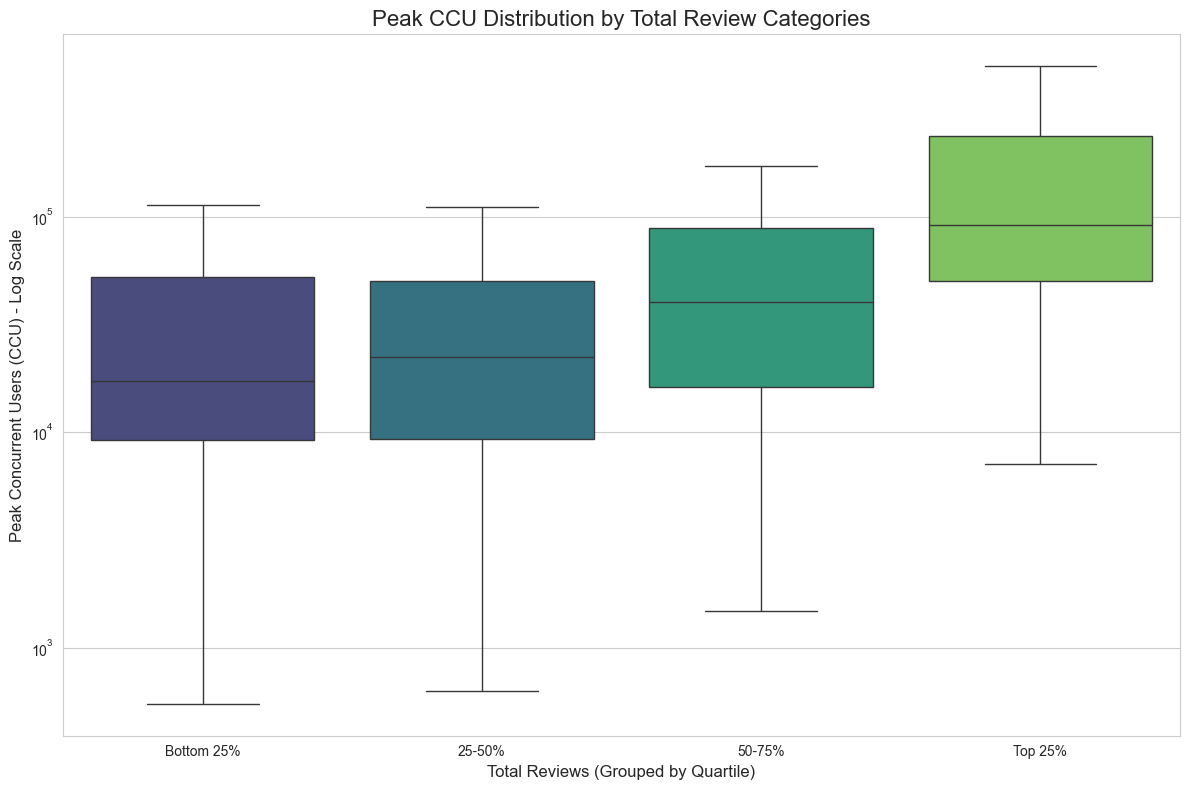

In [2]:
# Filter out games with zero reviews or CCU to avoid errors in log transformation
filtered_df = steam_df[(steam_df['num_reviews_total'] > 0) & (steam_df['peak_ccu'] > 0)].copy()

# Create categorical bins for 'num_reviews_total' based on its quantiles.
# This groups the continuous review data into four distinct categories.
quantiles = filtered_df['num_reviews_total'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
labels = ['Bottom 25%', '25-50%', '50-75%', 'Top 25%']
filtered_df['review_category'] = pd.cut(
    filtered_df['num_reviews_total'],
    bins=quantiles,
    labels=labels,
    include_lowest=True
)

# --- Generate the Box Plot ---
plt.figure(figsize=(12, 8))
sns.boxplot(
    x='review_category',
    y='peak_ccu',
    data=filtered_df,
    palette='viridis',
    showfliers=False  # Outliers are hidden for a cleaner view of the quartiles
)

# Use a logarithmic scale for the y-axis because the CCU values are widely spread
plt.yscale('log')

# Add descriptive titles and labels
plt.title('Peak CCU Distribution by Total Review Categories', fontsize=16)
plt.xlabel('Total Reviews (Grouped by Quartile)', fontsize=12)
plt.ylabel('Peak Concurrent Users (CCU) - Log Scale', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/qh/rp_bx0z54rldzblsdk7jf8980000gn/T/ipykernel_23305/1806470652.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


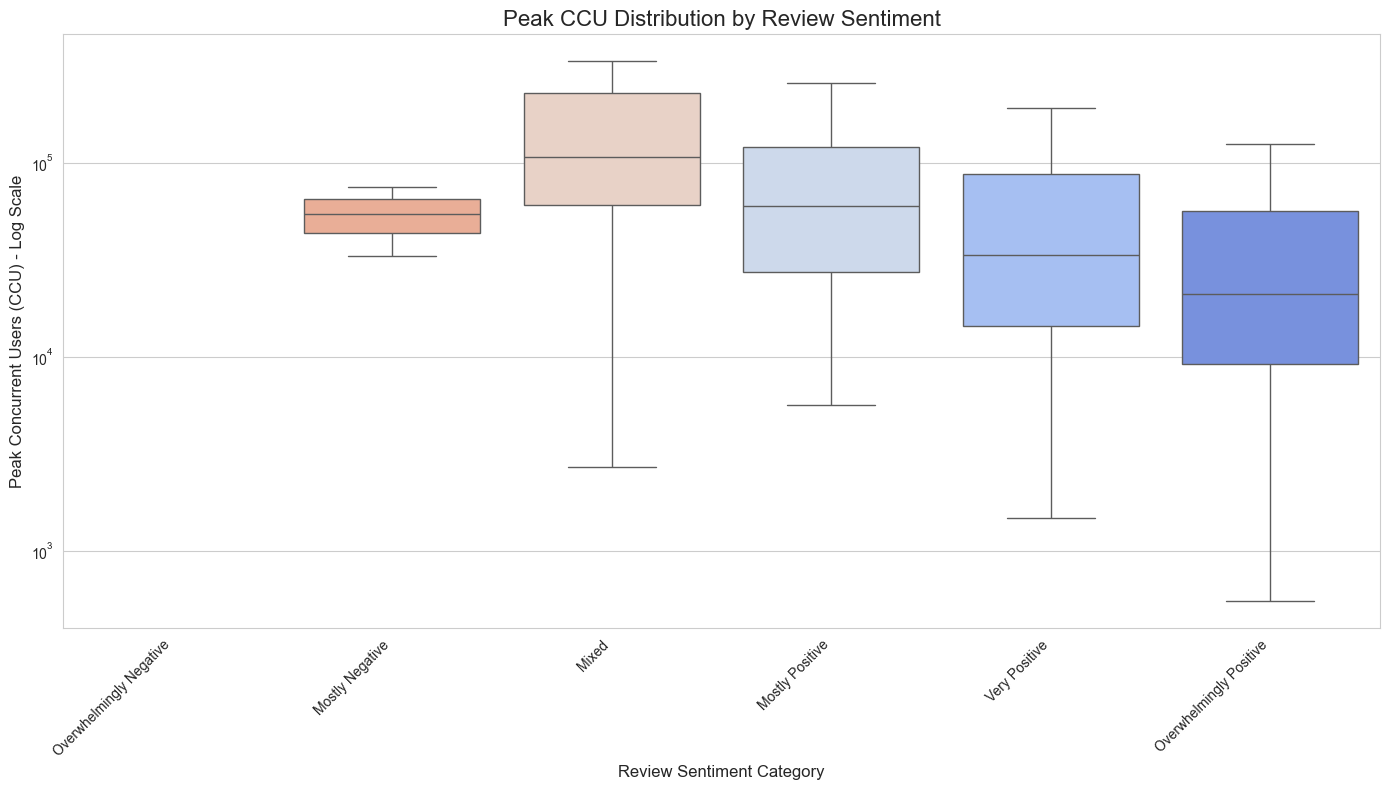

In [6]:
# 1. Define a function to categorize games based on their positive review percentage.
def categorize_reviews(pct_positive):
    """Converts a positive review percentage into a sentiment category."""
    if pct_positive >= 95:
        return 'Overwhelmingly Positive'
    elif pct_positive >= 80:
        return 'Very Positive'
    elif pct_positive >= 70:
        return 'Mostly Positive'
    elif pct_positive >= 40:
        return 'Mixed'
    elif pct_positive >= 20:
        return 'Mostly Negative'
    else:
        return 'Overwhelmingly Negative'

# 2. Filter the data for a more meaningful plot
# Only include games with more than 50 reviews and a peak CCU greater than 0.
filtered_df = steam_df[(steam_df['num_reviews_total'] > 50) & (steam_df['peak_ccu'] > 0)].copy()

# 3. Apply the function to create the new categorical feature
filtered_df['review_sentiment'] = filtered_df['pct_pos_total'].apply(categorize_reviews)


# 4. Generate the Box Plot
# Define a logical order for the categories for an intuitive plot
category_order = [
    'Overwhelmingly Negative', 'Mostly Negative', 'Mixed',
    'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive'
]

plt.figure(figsize=(14, 8))
sns.boxplot(
    x='review_sentiment',
    y='peak_ccu',
    data=filtered_df,
    order=category_order,
    palette='coolwarm_r', # A diverging palette highlights the trend
    showfliers=False # Hiding outliers for a cleaner view
)

# Use a logarithmic scale for the y-axis due to the wide range of CCU values
plt.yscale('log')

# Add titles and labels for clarity
plt.title('Peak CCU Distribution by Review Sentiment', fontsize=16)
plt.xlabel('Review Sentiment Category', fontsize=12)
plt.ylabel('Peak Concurrent Users (CCU) - Log Scale', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()

plt.show()


--- Analysis for Indie Games ---


/var/folders/qh/rp_bx0z54rldzblsdk7jf8980000gn/T/ipykernel_23305/1217902728.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


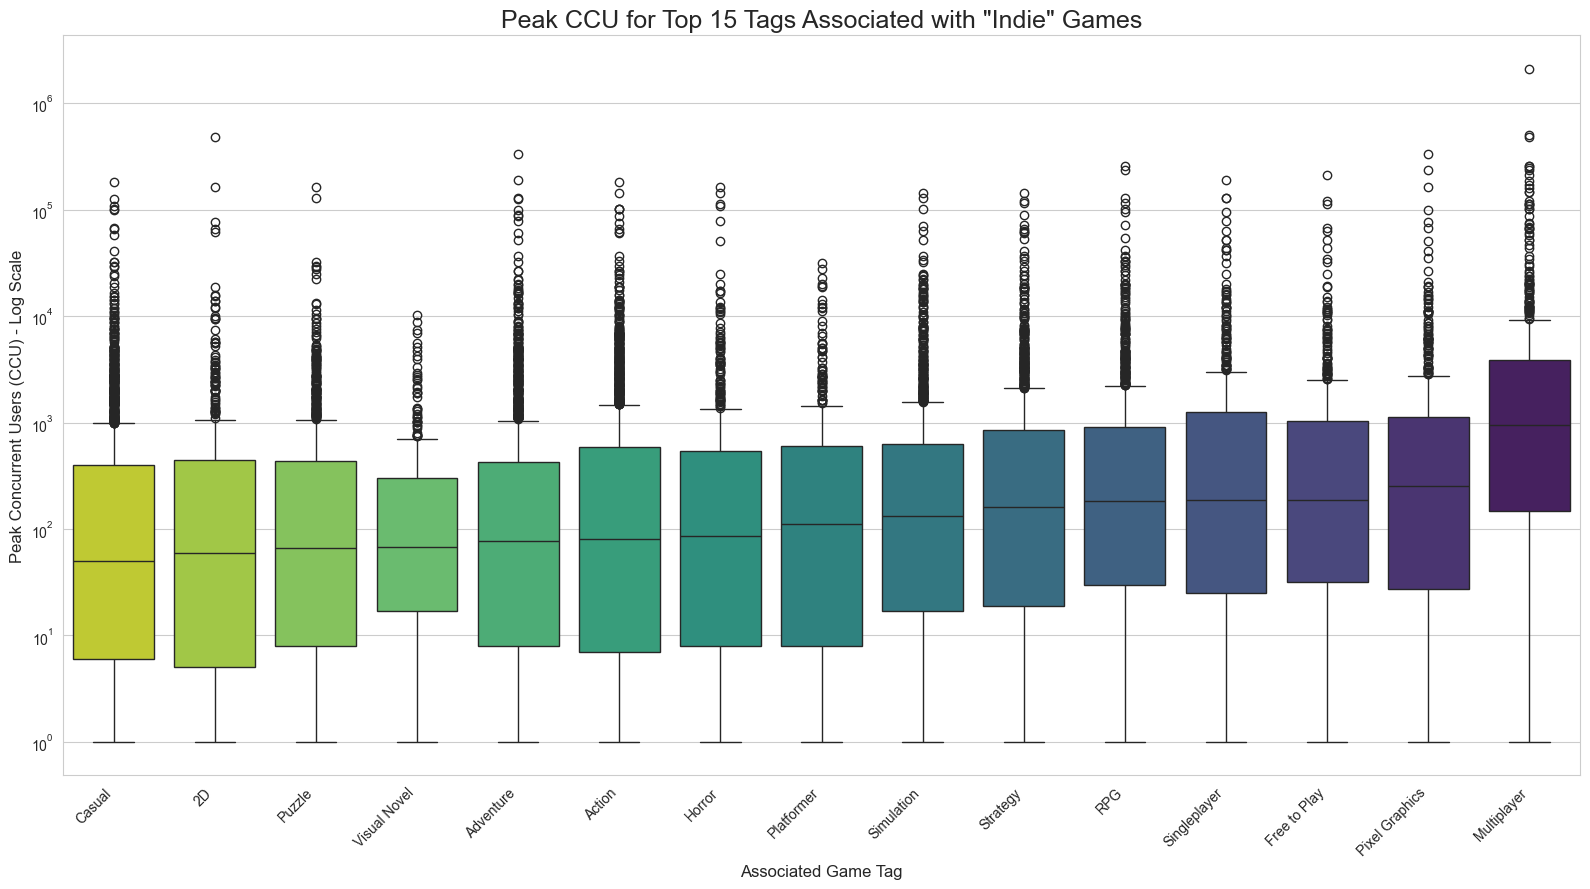


--- Analysis for Singleplayer Games ---


/var/folders/qh/rp_bx0z54rldzblsdk7jf8980000gn/T/ipykernel_23305/1217902728.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


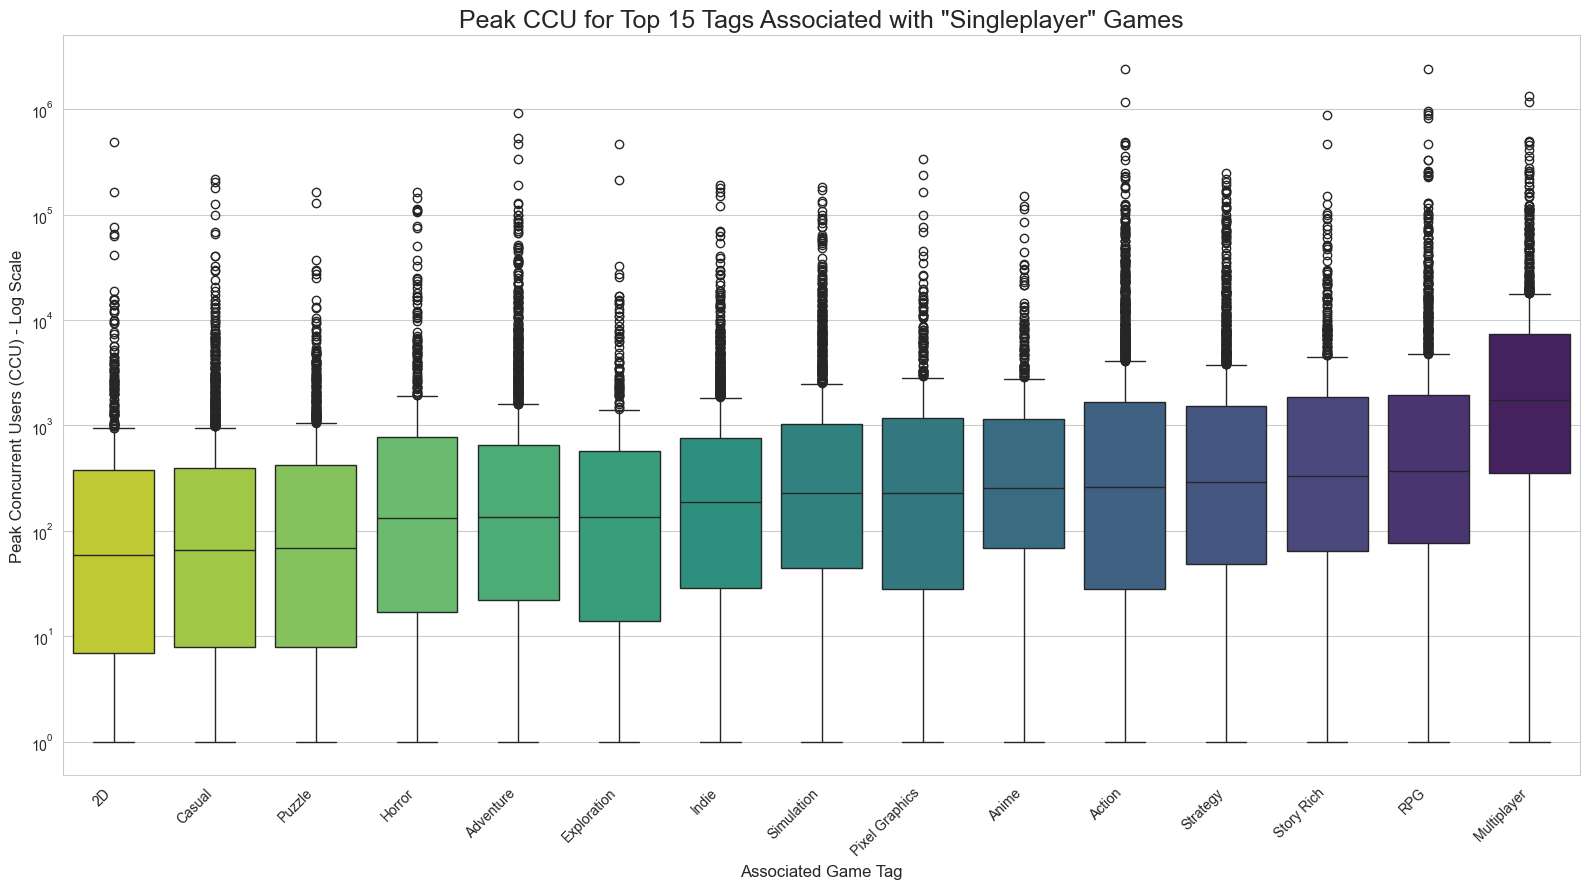


--- Analysis for Multiplayer Games ---


/var/folders/qh/rp_bx0z54rldzblsdk7jf8980000gn/T/ipykernel_23305/1217902728.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


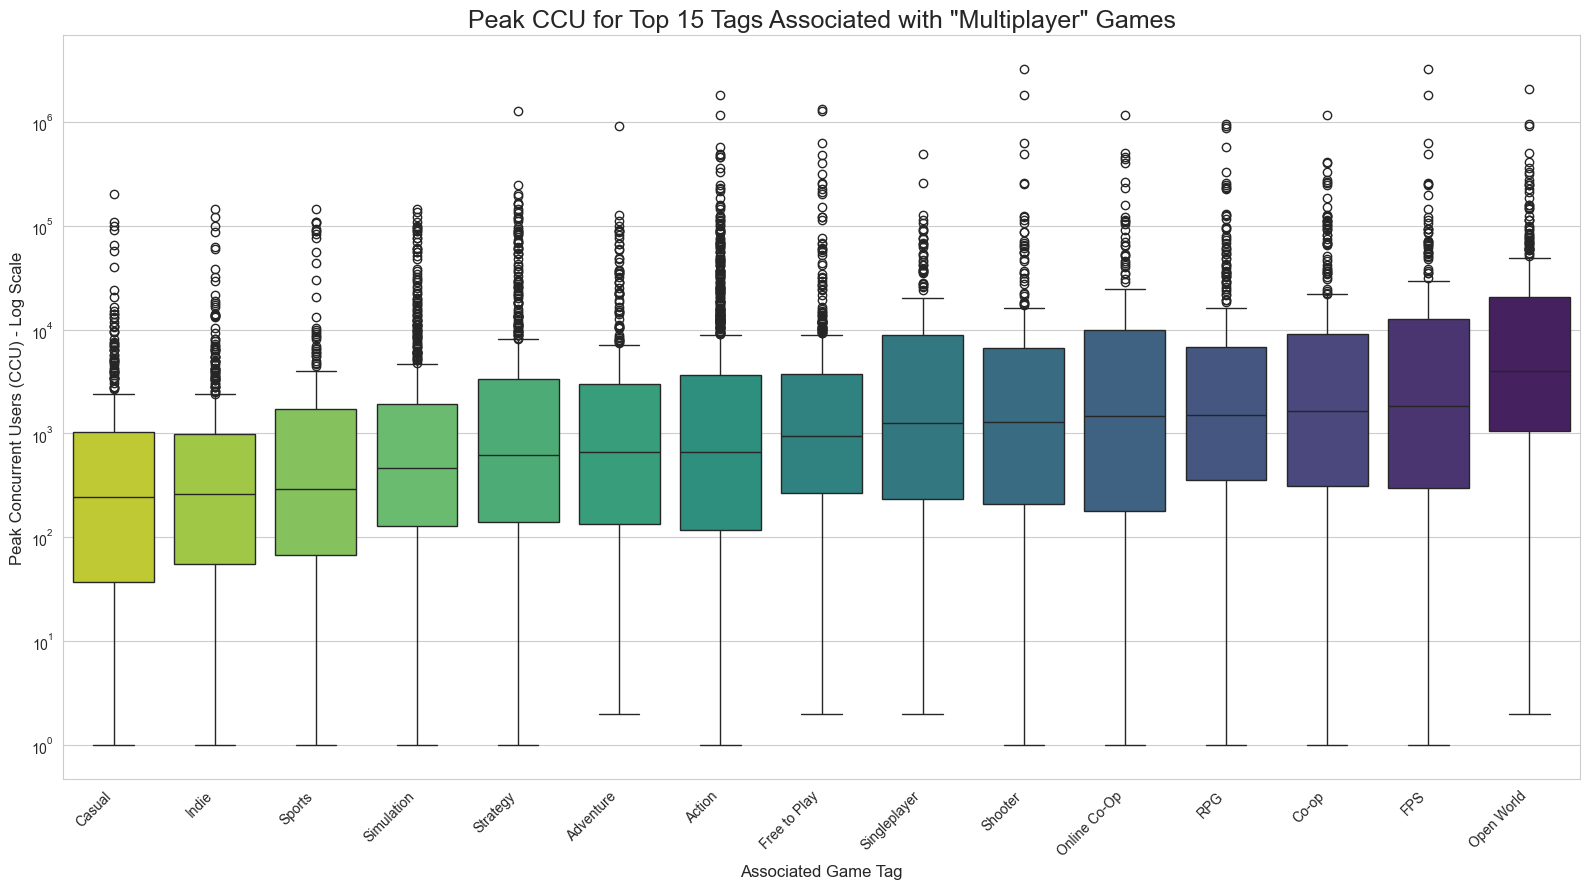


--- Analysis for F2P ---


/var/folders/qh/rp_bx0z54rldzblsdk7jf8980000gn/T/ipykernel_23305/1217902728.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


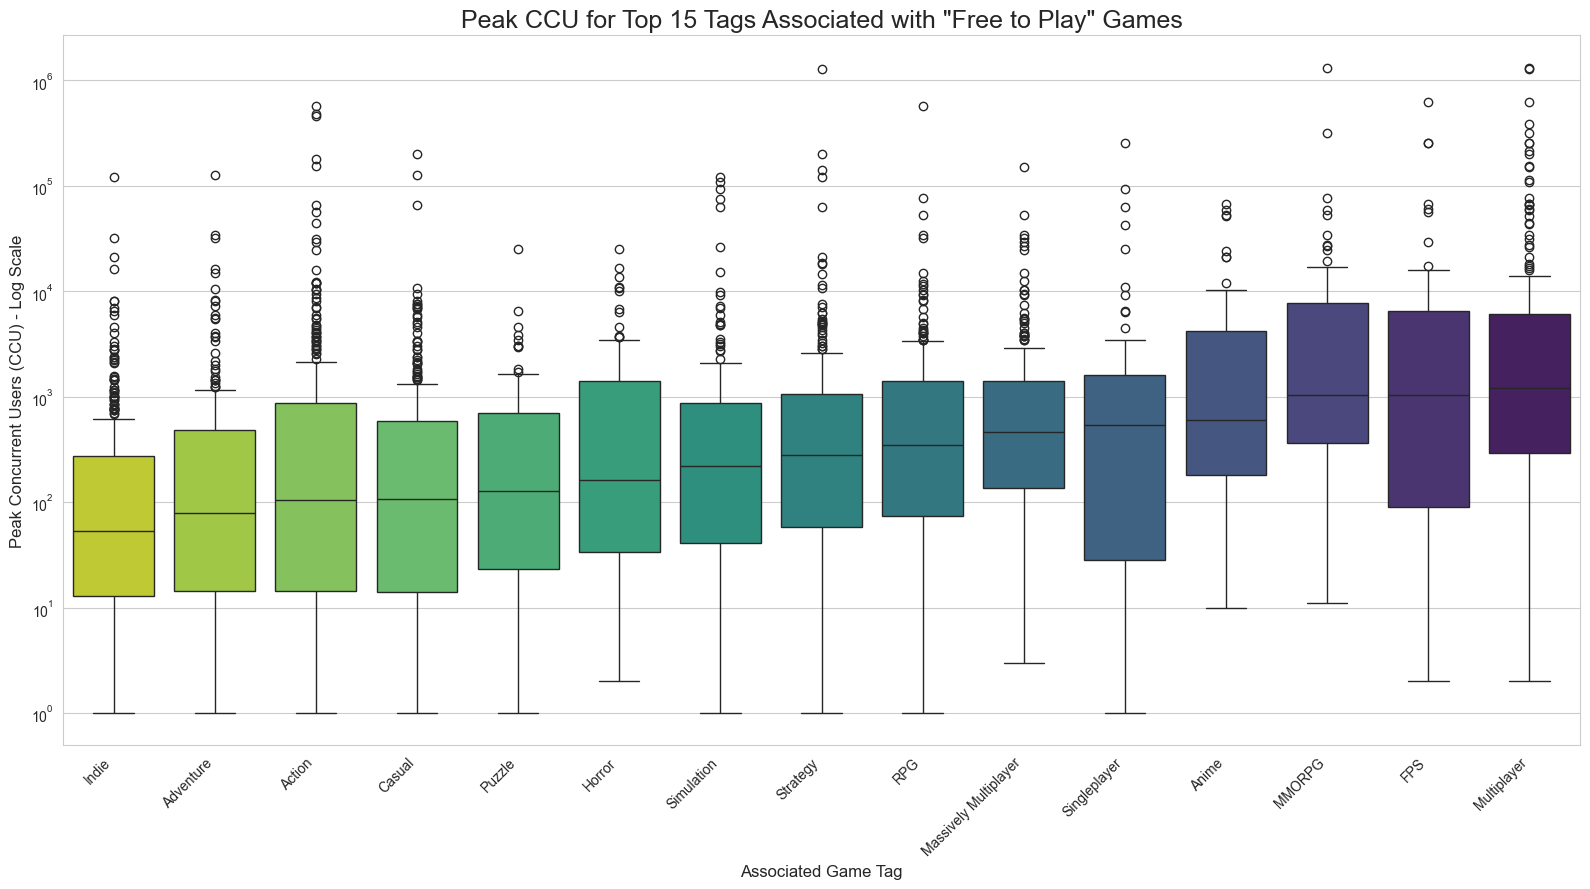

In [12]:
# --- 1. Helper Functions to Parse Tags (same as before) ---
def to_dict_if_str(v):
    if isinstance(v, str) and v.strip():
        try:
            return ast.literal_eval(v)
        except (ValueError, SyntaxError): return {}
    return v if isinstance(v, dict) else {}

def get_top_n_tags(tag_dict, n=5):
    if not tag_dict: return []
    sorted_items = sorted(tag_dict.items(), key=lambda kv: kv[1], reverse=True)
    return [k for k, _ in sorted_items[:n]]

# Apply the functions to the DataFrame
steam_df['tags'] = steam_df['tags'].apply(to_dict_if_str)
steam_df['top_tags'] = steam_df['tags'].apply(get_top_n_tags)


# --- 2. Reusable Plotting Function ---
def plot_peak_ccu_for_filtered_tags(df, filter_tag, top_n=15):
    """
    Filters a DataFrame for a specific tag, then creates a box plot of
    peak_ccu for the other most common tags found within that subset.
    """
    # Filter for games containing the specified tag
    filtered_df = df[df['tags'].apply(lambda x: filter_tag in x)].copy()
    
    # Explode the DataFrame to have one row per tag for each game
    exploded_df = filtered_df.explode('top_tags')
    
    # Exclude the filter_tag itself from the analysis
    exploded_df = exploded_df[exploded_df['top_tags'] != filter_tag]
    
    # Filter for valid peak_ccu values
    exploded_df = exploded_df[exploded_df['peak_ccu'] > 0]
    
    # Find the top N most common associated tags
    top_tags = exploded_df['top_tags'].value_counts().nlargest(top_n).index
    
    # Filter the DataFrame to only include these top tags
    plot_df = exploded_df[exploded_df['top_tags'].isin(top_tags)]
    
    # Order the tags by their median peak_ccu for a cleaner plot
    ordered_tags = plot_df.groupby('top_tags')['peak_ccu'].median().sort_values().index
    
    # --- Generate the Box Plot ---
    plt.figure(figsize=(16, 9))
    sns.boxplot(
        x='top_tags',
        y='peak_ccu',
        data=plot_df,
        order=ordered_tags,
        palette='viridis_r'
    )
    
    plt.yscale('log')
    plt.title(f'Peak CCU for Top {top_n} Tags Associated with "{filter_tag}" Games', fontsize=18)
    plt.xlabel('Associated Game Tag', fontsize=12)
    plt.ylabel('Peak Concurrent Users (CCU) - Log Scale', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()


# --- 3. Generate Plots for Your Specific Examples ---
print("--- Analysis for Indie Games ---")
plot_peak_ccu_for_filtered_tags(steam_df, 'Indie')

print("\n--- Analysis for Singleplayer Games ---")
plot_peak_ccu_for_filtered_tags(steam_df, 'Singleplayer')

print("\n--- Analysis for Multiplayer Games ---")
plot_peak_ccu_for_filtered_tags(steam_df, 'Multiplayer')
print("\n--- Analysis for F2P ---")
plot_peak_ccu_for_filtered_tags(steam_df, 'Free to Play')

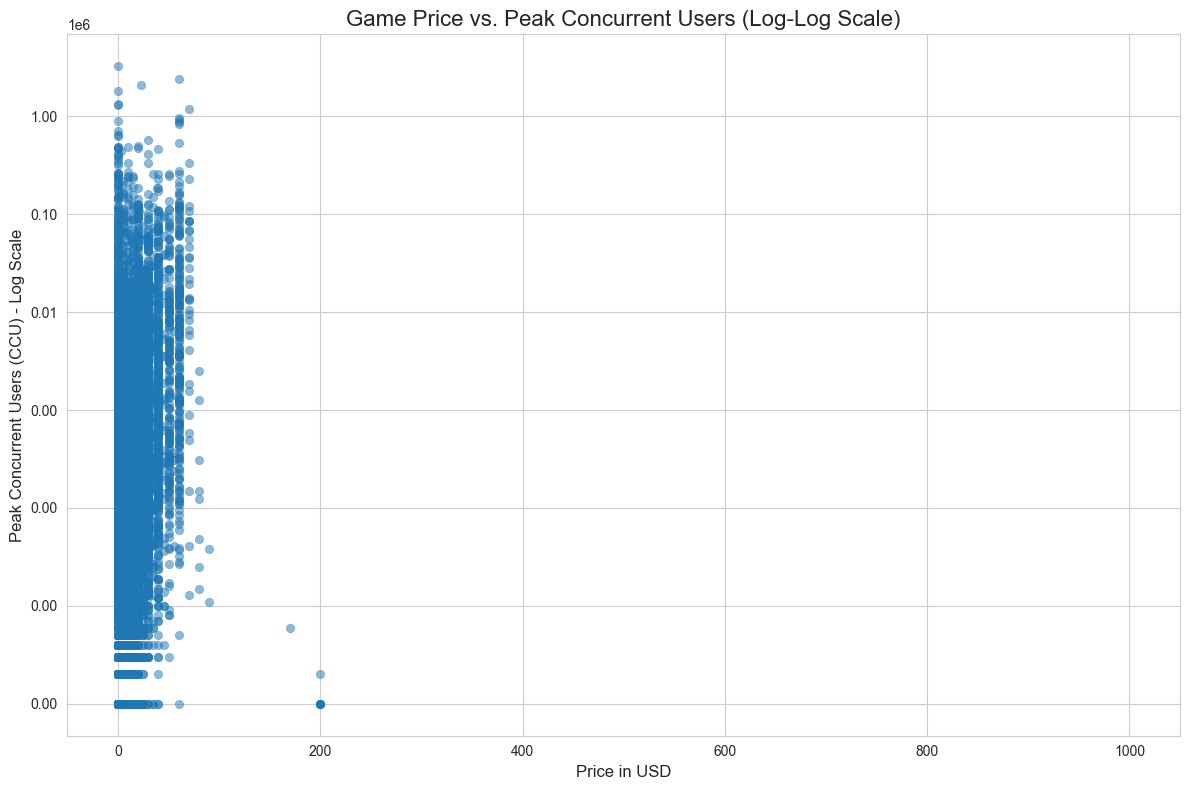

In [15]:
# --- 1. Data Preparation ---

# Filter for games with a price and peak_ccu greater than 0.
# This is necessary for plotting on a log-log scale.
plot_df = steam_df


# --- 2. Generate the Scatter Plot ---

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='price',
    y='peak_ccu',
    data=plot_df,
    alpha=0.5, # Use transparency to help visualize data density
    edgecolor=None # Remove point outlines for a cleaner look
)

# Set both axes to a logarithmic scale
plt.yscale('log')

# Add descriptive titles and labels
plt.title('Game Price vs. Peak Concurrent Users (Log-Log Scale)', fontsize=16)
plt.xlabel('Price in USD', fontsize=12)
plt.ylabel('Peak Concurrent Users (CCU) - Log Scale', fontsize=12)

# Improve axis labels for log scale
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.tight_layout()

# Display the plot
plt.show()

In [18]:
# Ensure release_date is a datetime object and extract the month
# This step is based on the data processing in your dataset.ipynb notebook
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])
steam_df['release_month'] = steam_df['release_date'].dt.month

# Filter for games with a recorded peak_ccu > 0
filtered_df = steam_df[steam_df['peak_ccu'] > 0].dropna(subset=['peak_ccu', 'release_month'])

# --- 2. Create Data Groups for the Test ---

# The Kruskal-Wallis test requires a separate array of data for each group (month).
# We create a list containing the peak_ccu data for each of the 12 months.
monthly_groups = [group['peak_ccu'].values for name, group in filtered_df.groupby('release_month')]

# --- 3. Perform the Kruskal-Wallis H-Test ---

# Unpack the list of monthly data into the function
h_statistic, p_value = stats.kruskal(*monthly_groups)

print("--- Kruskal-Wallis H-Test Results ---")
print(f"H-statistic: {h_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# --- 4. Interpret the Results ---

alpha = 0.05  # Set the significance level

print("\n--- Conclusion ---")
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
    print("✅ We reject the null hypothesis.")
    print("This suggests there is a statistically significant difference in the median peak CCU based on the release month.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than the significance level ({alpha}).")
    print("❌ We fail to reject the null hypothesis.")
    print("This suggests there is not enough statistical evidence to say that the release month has an effect on a game's peak CCU.")


--- Kruskal-Wallis H-Test Results ---
H-statistic: 27.0810
P-value: 0.0045

--- Conclusion ---
The p-value (0.0045) is less than the significance level (0.05).
✅ We reject the null hypothesis.
This suggests there is a statistically significant difference in the median peak CCU based on the release month.
